In [4]:
#.libPaths(c("/home/data/refdir/Rlib","/home/data/t060324/R/x86_64-pc-linux-gnu-library/4.1"))
library(scibet)
library(Seurat)
library(scater)
library(scran)
library(dplyr)
library(Matrix)
library(cowplot)
library(ggplot2)
library(harmony)
rm(list = ls())
gc()
setwd('/home/data/t060324/jobs/aimin/')

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,7994673,427.0,14809797,791.0,10277768,548.9
Vcells,13811145,105.4,889531478,6786.6,1012054332,7721.4


In [5]:
mergeData_immune <- readRDS(file = './output/1.sangleCell_pre/OV_mergeData_immune_final.RDS')

## 1. M1/M2 phenotype

In [9]:
M1_gene <- c('CCL5', 'CCR7', 'CD40', 'CD86', 'CXCL9', 'CXCL10', 'CXCL11','IFNG','IL12', 'IDO1', 'IL1A','IL1B', 'IL6', 'IRF1', 'IRF5' , 'KYNU')
M2_gene <- c('CCL4', 'CCL13', 'CCL18', 'CCL20', 'CCL22', 'CD276','CD163', 'CLEC7A', 'CTSA', 'CTSB', 'CTSC', 'CTSD','FN1', 'IL4R', 'IRF4', 'LYVE1', 'MMP9', 'MMP14', 'MMP19', 'MSR1', 'TGFB1', 'TGFB2', 'TGFB3', 'TNFSF8', 'TNFSF12', 'VEGFA', 'VEGFB' , 'VEGFC')

In [7]:
Macro <- subset(mergeData_immune,cellType %in% c('Macro_C1QB', 'Macro_CCL3L3','Macro_CXCL10','Macro_MARCO','Macro_MT1H','Macro_SPP1','Mono_FCN1'))

In [10]:
Macro <- AddModuleScore(object =Macro,features =  list(M1_gene,M2_gene),name = 'score_M')

Warning message:
“The following features are not present in the object: IL12, not searching for symbol synonyms”


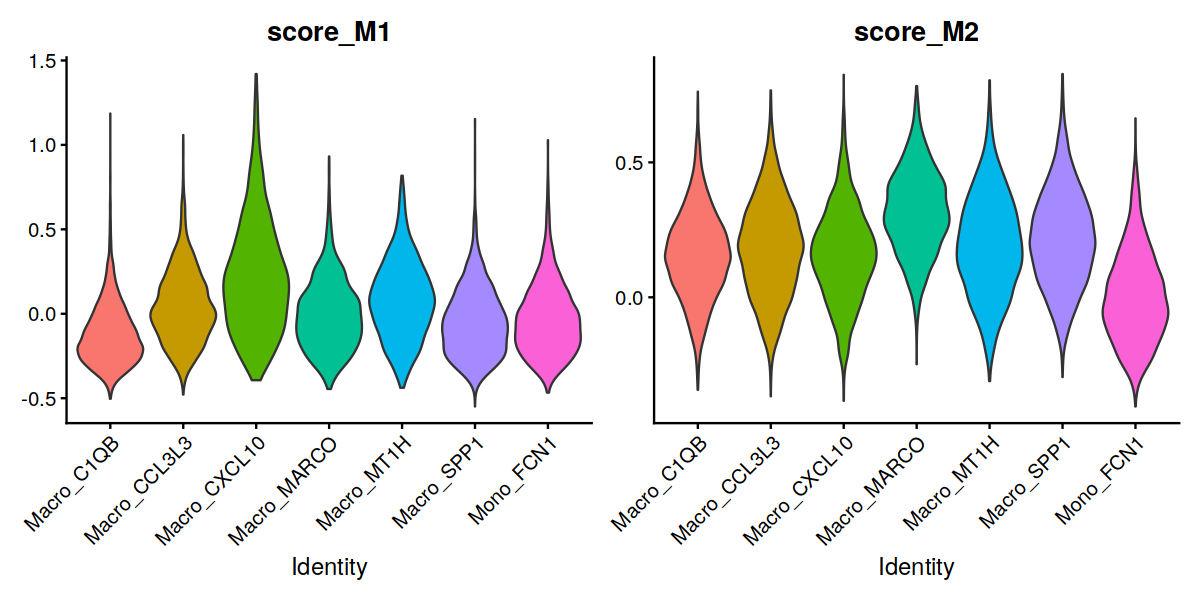

In [11]:
options(repr.plot.height = 5, repr.plot.width = 10)
VlnPlot(Macro,features = c('score_M1','score_M2'),pt.size = 0,group.by = 'cellType')

In [5]:
library(AUCell)

cells_rankings <- AUCell_buildRankings(Macro@assays$RNA@data)

In [166]:
cells_AUC <- AUCell_calcAUC(list(M1_phe=M1_gene,M2_phe=M2_gene), cells_rankings, aucMaxRank=nrow(cells_rankings)*0.1)

Genes in the gene sets NOT available in the dataset: 
	M1_phe: 	1 (6% of 16)



In [167]:
Macro$M1_score  <- as.numeric(getAUC(cells_AUC)['M1_phe', ])
Macro$M2_score  <- as.numeric(getAUC(cells_AUC)['M2_phe', ])

In [168]:
library(ggpubr)


Attaching package: ‘ggpubr’


The following object is masked from ‘package:cowplot’:

    get_legend




Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



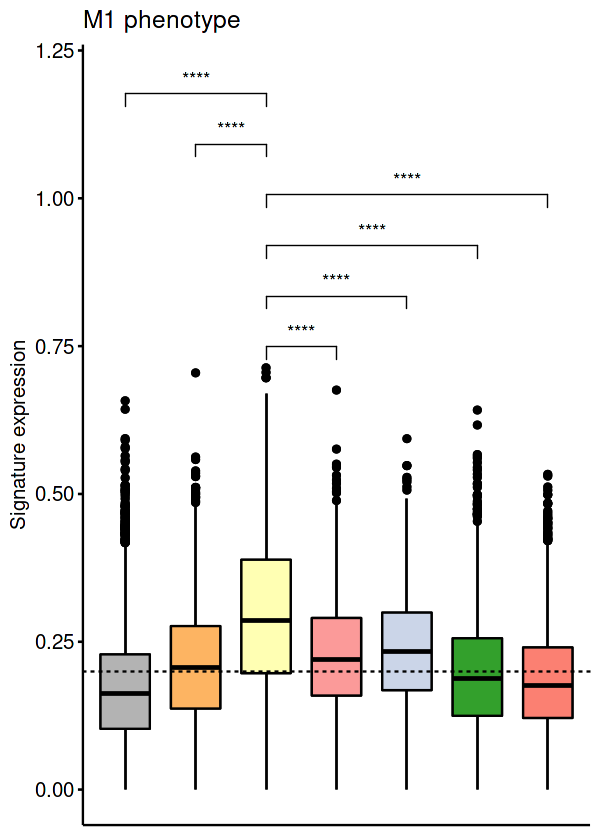

In [177]:
options(repr.plot.height = 7, repr.plot.width = 5)
my_comparisons <- list(  c("Macro_CXCL10", "Macro_MARCO"),c("Macro_CXCL10", "Macro_MT1H"),c("Macro_CXCL10", "Macro_SPP1"),c("Macro_CXCL10", "Mono_FCN1"),c("Macro_CXCL10", "Macro_CCL3L3"),c("Macro_CXCL10", "Macro_C1QB"))
vplotM1 <- ggboxplot(data = Macro@meta.data,x = 'cellType',y = 'M1_score',ylab = "Signature expression",legend = "none",title = 'M1 phenotype',fill = 'cellType',palette = "jco",add = 'boxplot')+ylim(c(0,1.2))+
scale_fill_manual(values = c(Macro_C1QB= '#B3B3B3',Mono_FCN1='#FB8072',Macro_CCL3L3='#FDB462',Macro_SPP1='#33A02C',Macro_CXCL10='#FFFFB3',Macro_MT1H='#CBD5E8',Macro_MARCO='#FB9A99'))+xlab(NULL) +
stat_compare_means(comparisons = my_comparisons,method = 't.test',label = "p.signif")+theme(axis.ticks.x = element_blank(),axis.text.x = element_blank())+geom_hline(yintercept = mean(Macro@meta.data$M1_score), linetype = 2)
vplotM1

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



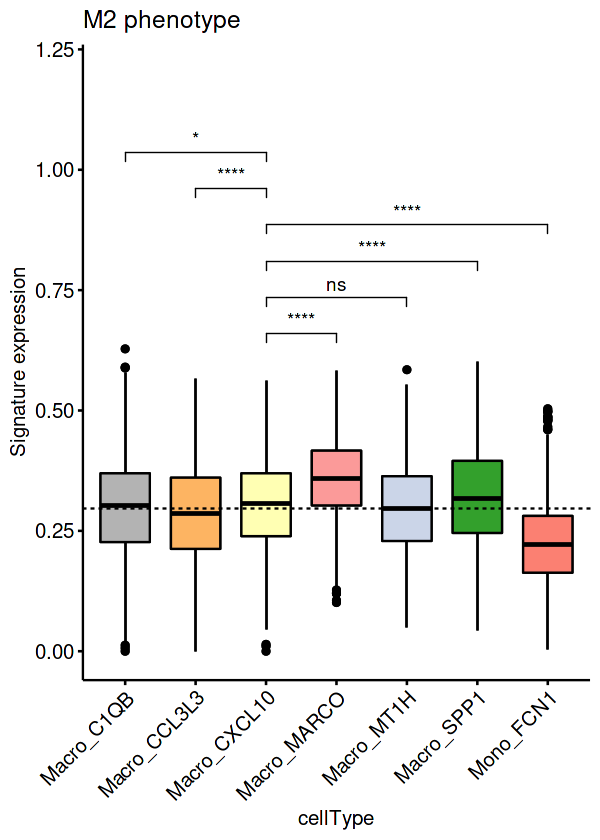

In [178]:
options(repr.plot.height = 7, repr.plot.width = 5)
my_comparisons <- list(  c("Macro_CXCL10", "Macro_MARCO"),c("Macro_CXCL10", "Macro_MT1H"),c("Macro_CXCL10", "Macro_SPP1"),c("Macro_CXCL10", "Mono_FCN1"),c("Macro_CXCL10", "Macro_CCL3L3"),c("Macro_CXCL10", "Macro_C1QB"))
vplotM2 <- ggboxplot(data = Macro@meta.data,x = 'cellType',y = 'M2_score',ylab = "Signature expression",legend = "none",title = 'M2 phenotype',fill = 'cellType',palette = "jco",add = 'boxplot')+ylim(c(0,1.2))+
scale_fill_manual(values = c(Macro_C1QB= '#B3B3B3',Mono_FCN1='#FB8072',Macro_CCL3L3='#FDB462',Macro_SPP1='#33A02C',Macro_CXCL10='#FFFFB3',Macro_MT1H='#CBD5E8',Macro_MARCO='#FB9A99'))+
stat_compare_means(comparisons = my_comparisons,method = 't.test',label = "p.signif")+theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1))+geom_hline(yintercept = mean(Macro@meta.data$M2_score), linetype = 2)
vplotM2

In [180]:
library(gridExtra)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:Biobase’:

    combine


The following object is masked from ‘package:BiocGenerics’:

    combine




In [182]:
?grid.arrange

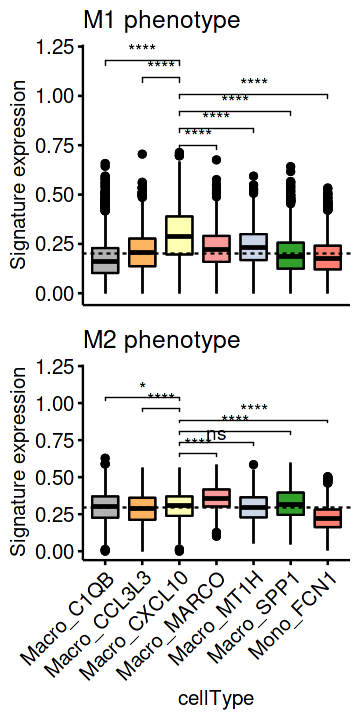

In [186]:
options(repr.plot.height = 6, repr.plot.width = 3)
grid.arrange(vplotM1,vplotM2,layout_matrix=matrix(c(1,1,1,1,2,2,2,2,2),ncol = 1))

In [187]:
pdf(file = './output/bulk/section_3/1.TAM_M1M2_scoreBoxplot.pdf',width = 3,height = 6)
grid.arrange(vplotM1,vplotM2,layout_matrix=matrix(c(1,1,1,1,2,2,2,2,2),ncol = 1))
dev.off()

png 
  2

## 2.Pathway activity characterization

In [12]:
library(testSctpa)

In [13]:
DefaultAssay(Macro) <- 'RNA'

In [16]:
Macro[['integrated']] <- NULL

In [17]:
Macro

An object of class Seurat 
47605 features across 20342 samples within 1 assay 
Active assay: RNA (47605 features, 3000 variable features)
 4 dimensional reductions calculated: pca, harmony, umap, tsne

In [18]:
Macro <- cal_PAS(seurat_object = Macro,
              tool = 'AUCell',   ## GSVA, ssGSEA, plage, zscore or Vision
              normalize = 'log',
              species = 'human', 
              pathway='reactome')

normalize success
             used   (Mb) gc trigger    (Mb)   max used    (Mb)
Ncells    9927834  530.3   14809797   791.0   14809797   791.0
Vcells 1263534205 9640.1 1963376306 14979.4 1391261289 10614.5


Warning message in .AUCell_buildRankings(exprMat = exprMat, featureType = featureType, :
“nCores is no longer used. It will be deprecated in the next AUCell version.”


             used    (Mb) gc trigger  (Mb)   max used    (Mb)
Ncells    9945367   531.2   14809797   791   14809797   791.0
Vcells 1747761109 13334.4 2729705037 20826 2273165861 17342.9
             used    (Mb) gc trigger  (Mb)   max used    (Mb)
Ncells    9949388   531.4   14809804   791   14809804   791.0
Vcells 1784346803 13613.5 2729705037 20826 2273165861 17342.9
             used    (Mb) gc trigger  (Mb)   max used    (Mb)
Ncells    9949391   531.4   14809804   791   14809804   791.0
Vcells 1784346827 13613.5 2729705037 20826 2273165861 17342.9


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message in cal_PAS(seurat_object = Macro, tool = "AUCell", normalize = "log", :
“Seurat”


In [19]:
Macro

An object of class Seurat 
49402 features across 20342 samples within 2 assays 
Active assay: PAS (1797 features, 0 variable features)
 1 other assay present: RNA
 4 dimensional reductions calculated: pca, harmony, umap, tsne

In [20]:
Idents(Macro) <- 'cellType'

In [21]:
Macro$cellType <- factor(Macro$cellType,
                         levels = c('Macro_C1QB', 'Macro_CCL3L3' ,'Macro_CXCL10',  'Macro_MARCO',   'Macro_MT1H' ,  'Macro_SPP1','Mono_FCN1'),
                                labels = c('Macro_C1QB', 'Macro_CCL3L3' ,'Macro_CXCL10',  'Macro_MARCO',   'Macro_MT1H' ,  'Macro_SPP1','Mono_FCN1')
                        )

In [33]:
Diff_pathway <- FindAllMarkers(Macro,logfc.threshold = 0.001,only.pos = T)

Calculating cluster Macro_C1QB

Calculating cluster Mono_FCN1

Calculating cluster Macro_CCL3L3

Calculating cluster Macro_SPP1

Calculating cluster Macro_CXCL10

Calculating cluster Macro_MT1H

Calculating cluster Macro_MARCO



In [34]:
subset(Diff_pathway,grepl(pattern = 'Interferon',gene))

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
Interferon-alpha-beta-signaling,0.000000e+00,0.11160262,1,1,0.000000e+00,Macro_CXCL10,Interferon-alpha-beta-signaling
Interferon-Signaling,0.000000e+00,0.06604979,1,1,0.000000e+00,Macro_CXCL10,Interferon-Signaling
Interferon-gamma-signaling,1.025829e-300,0.06650960,1,1,1.843414e-297,Macro_CXCL10,Interferon-gamma-signaling
Interferon-alpha-beta-signaling1,7.292457e-36,0.03567337,1,1,1.310454e-32,Macro_MARCO,Interferon-alpha-beta-signaling
Interferon-gamma-signaling1,1.437069e-34,0.02301059,1,1,2.582412e-31,Macro_MARCO,Interferon-gamma-signaling
Interferon-Signaling1,7.337890e-32,0.02074350,1,1,1.318619e-28,Macro_MARCO,Interferon-Signaling


In [39]:
pathways = Diff_pathway %>% group_by(cluster) %>% top_n(n=6,wt=avg_log2FC)

In [57]:
pathways$cluster <- factor(x = pathways$cluster,
                               levels = c('Macro_C1QB', 'Macro_CCL3L3' ,'Macro_CXCL10',  'Macro_MARCO',   'Macro_MT1H' ,  'Macro_SPP1','Mono_FCN1'),
                                labels = c('Macro_C1QB', 'Macro_CCL3L3' ,'Macro_CXCL10',  'Macro_MARCO',   'Macro_MT1H' ,  'Macro_SPP1','Mono_FCN1') 
                              )
pathways <- do.call(rbind,split(pathways,f = pathways$cluster))

In [58]:
head(pathways$cluster,20)

[1] Macro_C1QB   Macro_C1QB   Macro_C1QB   Macro_C1QB   Macro_C1QB  
 [6] Macro_C1QB   Macro_CCL3L3 Macro_CCL3L3 Macro_CCL3L3 Macro_CCL3L3
[11] Macro_CCL3L3 Macro_CCL3L3 Macro_CXCL10 Macro_CXCL10 Macro_CXCL10
[16] Macro_CXCL10 Macro_CXCL10 Macro_CXCL10 Macro_MARCO  Macro_MARCO 
7 Levels: Macro_C1QB Macro_CCL3L3 Macro_CXCL10 Macro_MARCO ... Mono_FCN1

In [59]:
DotPlot_data_pathway <- DotPlot(object = Macro,
        features = unique(pathways$gene),cols = c('blue','red'),group.by = 'cellType')

In [60]:
TAMPatway_data  <- DotPlot_data_pathway$data
TAMPatway_data$Zscore <- TAMPatway_data$avg.exp.scaled
TAMPatway_data$cluster <- factor(x = TAMPatway_data$id,
                               levels = c('Macro_C1QB', 'Macro_CCL3L3' ,'Macro_CXCL10',  'Macro_MARCO',   'Macro_MT1H' ,  'Macro_SPP1','Mono_FCN1'),
                                labels = c('Macro_C1QB', 'Macro_CCL3L3' ,'Macro_CXCL10',  'Macro_MARCO',   'Macro_MT1H' ,  'Macro_SPP1','Mono_FCN1') 
                              )

In [61]:
TAMPatway_data$features.plot <- gsub(pattern = '-',replacement = ' ',TAMPatway_data$features.plot)
TAMPatway_data$features.plot <- factor(TAMPatway_data$features.plot,levels = TAMPatway_data$features.plot,labels = TAMPatway_data$features.plot)

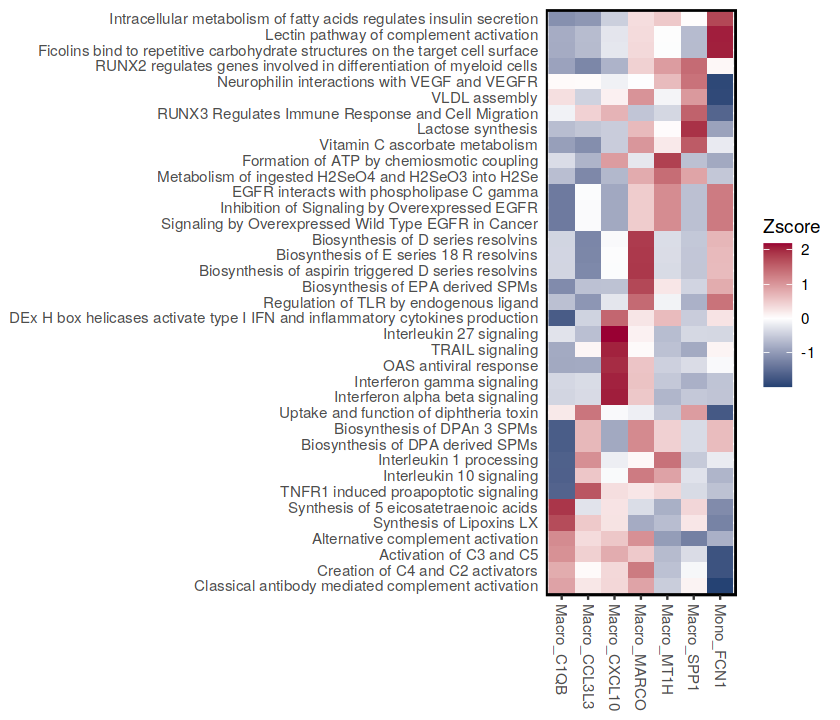

In [62]:
options(repr.plot.height = 6, repr.plot.width =7)
p1 <- ggplot(TAMPatway_data, aes(y=features.plot, x=cluster, fill=Zscore))+ 
geom_raster()+scale_fill_gradient2(low="#003366", high="#990033", mid="white",midpoint = 0)+
xlab(NULL) + ylab(NULL)+
  theme(panel.border = element_rect(fill=NA,color="black", size=1, linetype="solid"))+
theme(axis.text.x = element_text(angle = -90,hjust = 0,vjust = 0.5),axis.ticks.y = element_blank())
p1

In [137]:
pdf(file = './output/bulk/section_3/0.TAM_pathwayHeatmap.pdf',width = 7,height = 6)
print(p1)
dev.off()

png 
  2

## 3.Specific pathway of CCL3L3+ macrophages

In [8]:
Macro$cellType <- as.character(Macro$cellType)

In [10]:
table(Macro$cellType)


  Macro_C1QB Macro_CCL3L3 Macro_CXCL10  Macro_MARCO   Macro_MT1H   Macro_SPP1 
        7421         3390         1770         1386         1293         2962 
   Mono_FCN1 
        2120 

In [9]:
Idents(Macro) <- 'cellType'

In [50]:
Diff_pathway <- FindMarkers(Macro,logfc.threshold = 0.001,ident.1 = 'Macro_CCL3L3')

In [51]:
head(Diff_pathway)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Metabolism,2.486109e-202,-0.02578160,1.000,1.000,4.467539e-199
ATF4-activates-genes-in-response-to-endoplasmic-reticulum-stress,3.097030e-188,0.04197131,0.996,0.992,5.565363e-185
Respiratory-electron-transport,5.916524e-185,-0.07350516,1.000,1.000,1.063199e-181
Carbohydrate-metabolism,1.468980e-178,-0.01447524,1.000,1.000,2.639758e-175
Detoxification-of-Reactive-Oxygen-Species,2.064961e-169,-0.05320877,1.000,1.000,3.710734e-166
Transport-of-small-molecules,6.241385e-169,-0.01327062,1.000,1.000,1.121577e-165


In [81]:
Diff_pathway$log10P <- -log10(Diff_pathway$p_val_adj)
Diff_pathway$class <- ifelse(Diff_pathway$avg_log2FC>0,'pos','neg')
Diff_pathway$Pathway <- rownames(Diff_pathway)

In [82]:
head(Diff_pathway)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,log10P,class,Pathway
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Metabolism,2.486109e-202,-0.02578160,1.000,1.000,4.467539e-199,198.3499,neg,Metabolism
ATF4-activates-genes-in-response-to-endoplasmic-reticulum-stress,3.097030e-188,0.04197131,0.996,0.992,5.565363e-185,184.2545,pos,ATF4-activates-genes-in-response-to-endoplasmic-reticulum-stress
Respiratory-electron-transport,5.916524e-185,-0.07350516,1.000,1.000,1.063199e-181,180.9734,neg,Respiratory-electron-transport
Carbohydrate-metabolism,1.468980e-178,-0.01447524,1.000,1.000,2.639758e-175,174.5784,neg,Carbohydrate-metabolism
Detoxification-of-Reactive-Oxygen-Species,2.064961e-169,-0.05320877,1.000,1.000,3.710734e-166,165.4305,neg,Detoxification-of-Reactive-Oxygen-Species
Transport-of-small-molecules,6.241385e-169,-0.01327062,1.000,1.000,1.121577e-165,164.9502,neg,Transport-of-small-molecules


In [103]:
topPathway <- Diff_pathway %>% group_by(class) %>% top_n(n=20,wt=log10P)

In [66]:
#topPathway <- Diff_pathway %>%  top_n(n=20,wt=log10P)

In [65]:
#topPathway <- rbind(topPathway1,topPathway2)

In [74]:
#topPathway$class <- ifelse(topPathway$avg_log2FC>0,'pos','neg')
#topPathway$Pathway <- rownames(topPathway)

In [104]:
topPathway <- topPathway[order(topPathway$avg_log2FC),]

In [105]:
topPathway$Pathway <- factor(topPathway$Pathway,levels = topPathway$Pathway,labels = topPathway$Pathway)

In [107]:
topPathway <- topPathway[c(1:10,25:40),]

In [108]:
topPathway

p_val,avg_log2FC,pct.1,pct.2,p_val_adj,log10P,class,Pathway
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>
5.916524e-185,-0.07350516,1.000,1.000,1.063199e-181,180.97339,neg,Respiratory-electron-transport
3.590230e-161,-0.06292153,0.997,1.000,6.451643e-158,157.19033,neg,Complex-I-biogenesis
2.101445e-164,-0.06146194,1.000,1.000,3.776297e-161,160.42293,neg,Respiratory-electron-transport-ATP-synthesis-by-chemiosmotic-coupling-and-heat-production-by-uncoupling-proteins.
1.094355e-156,-0.05815449,1.000,1.000,1.966556e-153,152.70629,neg,Defective-CFTR-causes-cystic-fibrosis
1.594063e-158,-0.05753314,1.000,1.000,2.864532e-155,154.54295,neg,ER-Phagosome-pathway
8.915114e-163,-0.05714863,1.000,1.000,1.602046e-159,158.79533,neg,Antigen-processing-Cross-presentation
2.378155e-154,-0.05483004,1.000,1.000,4.273545e-151,150.36921,neg,Hedgehog-ligand-biogenesis
2.064961e-169,-0.05320877,1.000,1.000,3.710734e-166,165.43054,neg,Detoxification-of-Reactive-Oxygen-Species
1.789294e-158,-0.05242274,1.000,1.000,3.215362e-155,154.49277,neg,ABC-transporter-disorders


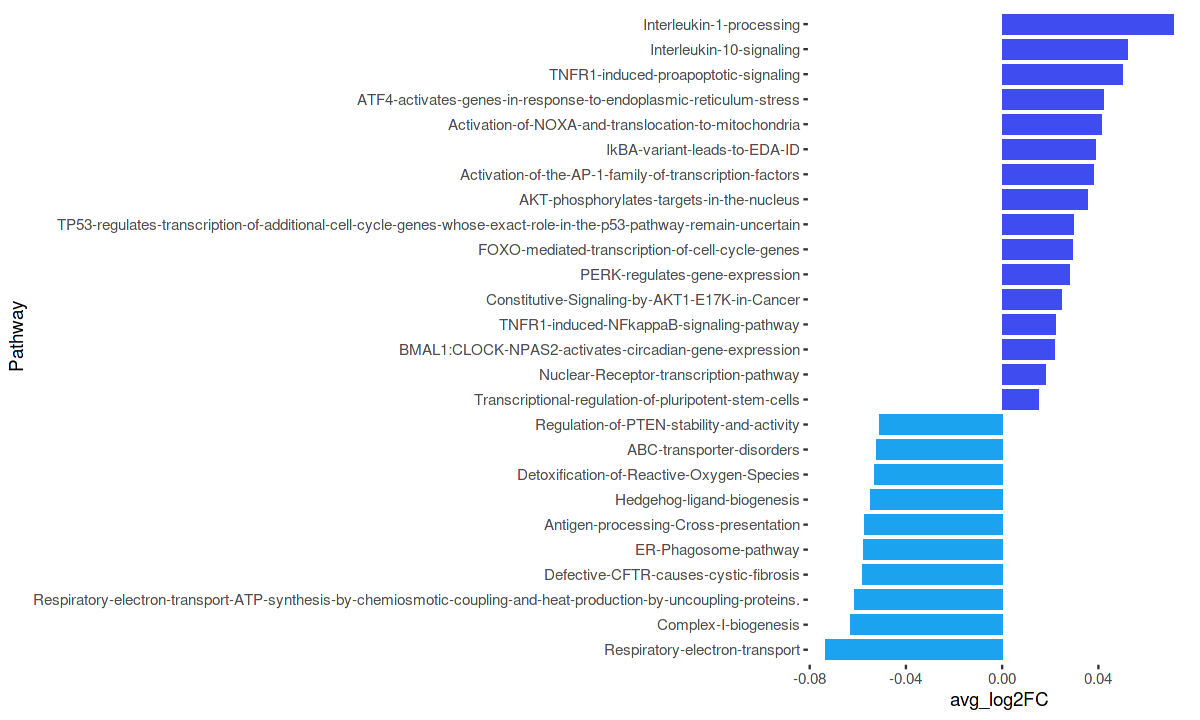

In [112]:
options(repr.plot.height = 6, repr.plot.width = 10)
p1 <- ggplot(topPathway,aes(x=Pathway,y=avg_log2FC,label=avg_log2FC))+scale_fill_manual(values = c('pos'='#3F4CEF','neg'='#1BA3EF'))+
geom_bar(stat = 'identity',aes(fill=class),width=.8)+coord_flip()+theme_bw()+
theme(legend.position="none",panel.background = element_blank(),panel.grid.minor=element_blank(),panel.grid.major=element_blank(),panel.border =element_blank() )
p1

In [113]:
pdf(file = './output/bulk/section_5/0.Macro_CCL3L3_pathwayBarplot.pdf',width = 10,height = 6)
print(p1)
dev.off()

png 
  2